![xarray Logo](http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png "xarray Logo")

# Introduction to Xarray

---

## Overview

This notebook will introduce the basics of gridded, labeled data with Xarray. Since Xarray introduces additional abstractions on top of plain arrays of data, our goal is to show why these abstractions are useful and how they frequently lead to simpler, more robust code.

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy Basics](../numpy/numpy-basics) | Necessary |  |
| [Intermediate NumPy](../numpy/intermediate-numpy) | Helpful | Familiarity with indexing and slicing arrays |
| [NumPy Broadcasting](../numpy/numpy-broadcasting) | Helpful | Familiar with array arithmetic and broadcasting |
| [Introduction to Pandas](../pandas/pandas) | Helpful | Familiarity with labeled data |
| [Datetime](../datetime/datetime) | Helpful | Familiarity with time formats and the `timedelta` object |
| [Understanding of NetCDF](some-link-to-external-resource) | Helpful | Familiarity with metadata structure |


---

## Imports

Simmilar to `numpy`, `np`; `pandas`, `pd`; you may often encounter `xarray` imported within a shortened namespace as `xr`. `pythia_datasets` provides example data for us to work with.

In [1]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
#from pythia_datasets import DATASETS

## Introducing the `DataArray` and `Dataset`

Xarray expands on the capabilities on NumPy arrays, providing a lot of streamlined data manipulation. It is similar in that respect to Pandas, but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java's [Common Data Model (CDM)](https://docs.unidata.ucar.edu/netcdf-java/current/userguide/common_data_model_overview.html). 

<center> <img src="dataset-diagram.png" width="600"/> </center>

### Creation of a `DataArray` object

The `DataArray` is one of the basic building blocks of Xarray (see docs [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataarray)). It provides a `numpy.ndarray`-like object that expands to provide two critical pieces of functionality:

1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful
2. It has a built-in container for attributes

Here we'll initialize a `DataArray` object by wrapping a plain NumPy array, and explore a few of its properties.

#### Generate a random numpy array

For our first example, we'll just create a random array of "temperature" data in units of Kelvin:

In [3]:
data = 283 + 5 * np.random.randn(5, 3, 4)
data

array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])

In [7]:
data

array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])

#### Wrap the array: first attempt

Now we create a basic `DataArray` just by passing our plain `data` as input:

In [5]:
temp = xr.DataArray(data)
temp

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)>
array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

Note two things:

1. Xarray generates some basic dimension names for us (`dim_0`, `dim_1`, `dim_2`). We'll improve this with better names in the next example.
2. Wrapping the numpy array in a `DataArray` gives us a rich display in the notebook! (Try clicking the array symbol to expand or collapse the view)

#### Assign dimension names

Much of the power of Xarray comes from making use of named dimensions. So let's add some more useful names! We can do that by passing an ordered list of names using the keyword argument `dims`:

In [8]:
temp = xr.DataArray(data, dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])
Dimensions without coordinates: time, lat, lon

This is already improved upon from a NumPy array, because we have names for each of the dimensions (or axes in NumPy parlance). Even better, we can take arrays representing the values for the coordinates for each of these dimensions and associate them with the data when we create the `DataArray`. We'll see this in the next example.

### Create a `DataArray` with named Coordinates

#### Make time and space coordinates

Here we will use [Pandas](../pandas) to create an array of [datetime data](../datetime), which we will then use to create a `DataArray` with a named coordinate `time`.

In [9]:
times = pd.date_range('2018-01-01', periods=5)
times

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

We'll also create arrays to represent sample longitude and latitude:

In [12]:
lons = np.linspace(-120, -60, 4)
lats = np.linspace(25, 55, 3)

In [14]:
lats

array([25., 40., 55.])

#### Initialize the `DataArray` with complete coordinate info

When we create the `DataArray` instance, we pass in the arrays we just created:

In [15]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

#### Set useful attributes

...and while we're at it, we can also set some attribute metadata:

In [16]:
temp.attrs['units'] = 'kelvin'
temp.attrs['standard_name'] = 'air_temperature'

temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[289.16431256, 281.27484982, 284.25073935, 274.20286798],
        [285.55226178, 273.73337976, 276.89462676, 286.19129114],
        [290.42651781, 284.50744284, 277.49370685, 286.80652696]],

       [[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
        [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
        [288.32841169, 276.67758429, 276.20060126, 282.94102056]],

       [[276.58302732, 278.75385016, 294.20164343, 275.44535167],
        [290.31900215, 285.21028037, 283.59722577, 281.26443125],
        [280.06588757, 282.5191962 , 280.72181801, 284.68488161]],

       [[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
        [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
        [281.98539879, 281.97919283, 286.01813923, 275.98727729]],

       [[286.74408295, 279.48646934, 277.31480407, 288.91004034],
        [281.79315535, 284.62488052, 287.43760774, 282.79629486],
        [283.12934068, 288.72726504, 285.3262593 , 277.42415451]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

#### Attributes are not preserved by default!

Notice what happens if we perform a mathematical operaton with the `DataArray`: the coordinate values persist, but the attributes are lost. This is done because it is very challenging to know if the attribute metadata is still correct or appropriate after arbitrary arithmetic operations.

To illustrate this, we'll do a simple unit conversion from Kelvin to Celsius:

In [17]:
temp_in_celsius = temp - 273.15
temp_in_celsius

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[16.01431256,  8.12484982, 11.10073935,  1.05286798],
        [12.40226178,  0.58337976,  3.74462676, 13.04129114],
        [17.27651781, 11.35744284,  4.34370685, 13.65652696]],

       [[10.27028142,  3.3462948 , 11.13824888, 16.12523682],
        [ 6.80387629, 11.04084444, 14.67182008,  8.5462227 ],
        [15.17841169,  3.52758429,  3.05060126,  9.79102056]],

       [[ 3.43302732,  5.60385016, 21.05164343,  2.29535167],
        [17.16900215, 12.06028037, 10.44722577,  8.11443125],
        [ 6.91588757,  9.3691962 ,  7.57181801, 11.53488161]],

       [[16.10360683, 11.54496176,  9.71596923, 20.5560666 ],
        [17.11554498, 12.6275732 , 16.90384678,  8.27340624],
        [ 8.83539879,  8.82919283, 12.86813923,  2.83727729]],

       [[13.59408295,  6.33646934,  4.16480407, 15.76004034],
        [ 8.64315535, 11.47488052, 14.28760774,  9.64629486],
        [ 9.97934068, 15.57726504, 12.1762593 ,  4.27415451]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

For an in-depth discussion of how Xarray handles metadata, start in the Xarray docs [here](http://xarray.pydata.org/en/stable/getting-started-guide/faq.html#approach-to-metadata).

### The `Dataset`: a container for `DataArray`s with shared coordinates

Along with `DataArray`, the other key object type in Xarray is the `Dataset`: a dictionary-like container that holds one or more `DataArray`s, which can also optionally share coordinates (see docs [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataset)).

The most common way to create a `Dataset` object is to load data from a file (see [below](#Opening-netCDF-data)). Here, instead, we will create another `DataArray` and combine it with our `temp` data.

This will illustrate how the information about common coordinate axes is used.

#### Create a pressure `DataArray` using the same coordinates

This code mirrors how we created the `temp` object above.

In [18]:
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)

pressure = xr.DataArray(
    pressure_data, coords=[times, lats, lons], dims=['time', 'lat', 'lon']
)

pressure.attrs['units'] = 'hPa'
pressure.attrs['standard_name'] = 'air_pressure'

pressure

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[1000.24190153, 1004.35729415, 1001.44506652,  999.67833729],
        [1000.29661286, 1010.39552614,  999.33782261, 1003.42092236],
        [ 997.28908344, 1001.54106449,  997.12930208,  998.59063891]],

       [[ 998.58070498,  994.05406583,  996.83343373, 1009.99549084],
        [ 993.75502189, 1006.1747369 , 1001.71329154, 1005.57753471],
        [1001.24053137,  999.41417806,  994.58624309, 1010.51786212]],

       [[1007.07172086,  994.43548077,  994.45604811,  992.15425759],
        [1004.88746188, 1005.17956155, 1000.14862095,  994.15826548],
        [1007.26954787, 1002.29515136,  997.26656026, 1001.79434573]],

       [[1005.78417624,  996.78359504, 1004.24718085,  999.84697752],
        [ 987.33136995, 1002.08582998,  997.98314021, 1006.63337539],
        [1002.50583233,  998.06920596, 1001.3151208 ,  987.16459118]],

       [[ 998.04365591,  999.08990317,  997.11929948,  998.32853877],
        [1002.68112198,  998.25730755,  996.43071475,  995.1943303 ],
        [ 995.90899825, 1003.68675101,  992.41282746,  995.35397303]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

#### Create a `Dataset` object

Each `DataArray` in our `Dataset` needs a name! 

The most straightforward way to create a `Dataset` with our `temp` and `pressure` arrays is to pass a dictionary using the keyword argument `data_vars`:

In [20]:
# ds = xr.Dataset(data_vars=DICT)
# DICT are defined
# {'a':[1, 2, 3], 'b':[4, 5, 6]}
# dict(a=[1,2,3], b=[4, 5,6])
ds = xr.Dataset(data_vars={'Temperature': temp, 'Pressure': pressure})
ds

<xarray.Dataset>
Dimensions:      (time: 5, lat: 3, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat          (lat) float64 25.0 40.0 55.0
  * lon          (lon) float64 -120.0 -100.0 -80.0 -60.0
Data variables:
    Temperature  (time, lat, lon) float64 289.2 281.3 284.3 ... 285.3 277.4
    Pressure     (time, lat, lon) float64 1e+03 1.004e+03 ... 992.4 995.4

In [21]:
air_temperature = 10.0 + 4 * np.random.randn(5, 3, 4, 6)

In [25]:
air_temperature.shape

(5, 3, 4, 6)

In [27]:
zlev = np.linspace(0, 50, 6)
zlev

array([ 0., 10., 20., 30., 40., 50.])

In [31]:
air_temperature = xr.DataArray(
    air_temperature, coords=[times, lats, lons, zlev], dims=['time', 'lat', 'lon', 'zlev']
)
air_temperature

<xarray.DataArray (time: 5, lat: 3, lon: 4, zlev: 6)>
array([[[[ 9.49361601, 10.81008583, 11.63443289, 10.07358851,
           7.75380523,  6.43786586],
         [ 8.40531754, 16.23096945,  6.97189106,  1.70326285,
           9.36123399,  6.06314204],
         [11.41295007, 11.52662595, 17.24516493,  7.89965164,
          14.13347137, 14.10520808],
         [14.99766874,  5.53459687, 16.09926356,  9.14777095,
           5.78775338,  7.87506736]],

        [[ 9.26597654,  7.90242279,  5.34633045, 13.57296456,
           7.69207999,  5.35059991],
         [ 4.27695298,  9.18041786,  7.60051508, 13.7324797 ,
           5.27785766, 12.25929161],
         [11.7835034 ,  8.36662163,  4.68965198, 19.33349399,
          10.43728153, 13.32266526],
         [10.3930403 , 15.29329574, 11.41630469,  9.32588559,
          11.1293701 , 14.38722579]],

        [[11.76400057, 11.23660071,  9.5345508 , 11.07775861,
           9.83994468, 17.16063817],
...
         [14.14844341,  8.4297226 ,  4.60686063,  5.92356004,
          10.97272199, 11.36477309]],

        [[ 5.98898533, 12.2714804 ,  6.92722104, 14.45319482,
          11.21555808,  9.28045534],
         [14.40685159, 14.67798132, 11.5204829 ,  4.9265485 ,
           6.12489046, 11.74442881],
         [13.93557033, 10.18743824, 14.30996478, 10.16004954,
          11.79092691, 10.69791615],
         [14.08243691,  9.40172792,  9.7473334 , 14.35757538,
          13.04694463, 10.42907511]],

        [[ 8.39610766,  3.51211467, 14.37374974,  4.24126026,
          11.72873819,  7.75604463],
         [11.30070544, 10.11558517,  6.88965058,  4.74835153,
          10.9336809 ,  9.07552531],
         [ 6.73532575,  5.77919614,  6.39895619, 16.62175413,
          12.25415354,  4.87571523],
         [10.76896882,  8.12264319,  7.52485041,  5.68644687,
          10.54859929, 14.14565751]]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
  * zlev     (zlev) float64 0.0 10.0 20.0 30.0 40.0 50.0

In [33]:
ds['AirTemperature'] = air_temperature

In [34]:
ds

<xarray.Dataset>
Dimensions:         (time: 5, lat: 3, lon: 4, zlev: 6)
Coordinates:
  * time            (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat             (lat) float64 25.0 40.0 55.0
  * lon             (lon) float64 -120.0 -100.0 -80.0 -60.0
  * zlev            (zlev) float64 0.0 10.0 20.0 30.0 40.0 50.0
Data variables:
    Temperature     (time, lat, lon) float64 289.2 281.3 284.3 ... 285.3 277.4
    Pressure        (time, lat, lon) float64 1e+03 1.004e+03 ... 992.4 995.4
    AirTemperature  (time, lat, lon, zlev) float64 9.494 10.81 ... 10.55 14.15

Notice that the `Dataset` object `ds` is aware that both data arrays sit on the same coordinate axes.

#### Access Data variables and Coordinates in a `Dataset`

We can pull out any of the individual `DataArray` objects in a few different ways.

Using the "dot" notation:

In [36]:
ds.AirTemperature

<xarray.DataArray 'AirTemperature' (time: 5, lat: 3, lon: 4, zlev: 6)>
array([[[[ 9.49361601, 10.81008583, 11.63443289, 10.07358851,
           7.75380523,  6.43786586],
         [ 8.40531754, 16.23096945,  6.97189106,  1.70326285,
           9.36123399,  6.06314204],
         [11.41295007, 11.52662595, 17.24516493,  7.89965164,
          14.13347137, 14.10520808],
         [14.99766874,  5.53459687, 16.09926356,  9.14777095,
           5.78775338,  7.87506736]],

        [[ 9.26597654,  7.90242279,  5.34633045, 13.57296456,
           7.69207999,  5.35059991],
         [ 4.27695298,  9.18041786,  7.60051508, 13.7324797 ,
           5.27785766, 12.25929161],
         [11.7835034 ,  8.36662163,  4.68965198, 19.33349399,
          10.43728153, 13.32266526],
         [10.3930403 , 15.29329574, 11.41630469,  9.32588559,
          11.1293701 , 14.38722579]],

        [[11.76400057, 11.23660071,  9.5345508 , 11.07775861,
           9.83994468, 17.16063817],
...
         [14.14844341,  8.4297226 ,  4.60686063,  5.92356004,
          10.97272199, 11.36477309]],

        [[ 5.98898533, 12.2714804 ,  6.92722104, 14.45319482,
          11.21555808,  9.28045534],
         [14.40685159, 14.67798132, 11.5204829 ,  4.9265485 ,
           6.12489046, 11.74442881],
         [13.93557033, 10.18743824, 14.30996478, 10.16004954,
          11.79092691, 10.69791615],
         [14.08243691,  9.40172792,  9.7473334 , 14.35757538,
          13.04694463, 10.42907511]],

        [[ 8.39610766,  3.51211467, 14.37374974,  4.24126026,
          11.72873819,  7.75604463],
         [11.30070544, 10.11558517,  6.88965058,  4.74835153,
          10.9336809 ,  9.07552531],
         [ 6.73532575,  5.77919614,  6.39895619, 16.62175413,
          12.25415354,  4.87571523],
         [10.76896882,  8.12264319,  7.52485041,  5.68644687,
          10.54859929, 14.14565751]]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
  * zlev     (zlev) float64 0.0 10.0 20.0 30.0 40.0 50.0

... or using dictionary access like this:

In [37]:
ds['Pressure']

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1000.24190153, 1004.35729415, 1001.44506652,  999.67833729],
        [1000.29661286, 1010.39552614,  999.33782261, 1003.42092236],
        [ 997.28908344, 1001.54106449,  997.12930208,  998.59063891]],

       [[ 998.58070498,  994.05406583,  996.83343373, 1009.99549084],
        [ 993.75502189, 1006.1747369 , 1001.71329154, 1005.57753471],
        [1001.24053137,  999.41417806,  994.58624309, 1010.51786212]],

       [[1007.07172086,  994.43548077,  994.45604811,  992.15425759],
        [1004.88746188, 1005.17956155, 1000.14862095,  994.15826548],
        [1007.26954787, 1002.29515136,  997.26656026, 1001.79434573]],

       [[1005.78417624,  996.78359504, 1004.24718085,  999.84697752],
        [ 987.33136995, 1002.08582998,  997.98314021, 1006.63337539],
        [1002.50583233,  998.06920596, 1001.3151208 ,  987.16459118]],

       [[ 998.04365591,  999.08990317,  997.11929948,  998.32853877],
        [1002.68112198,  998.25730755,  996.43071475,  995.1943303 ],
        [ 995.90899825, 1003.68675101,  992.41282746,  995.35397303]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

We'll return to the `Dataset` object when we start loading data from files.

## Subsetting and selection by coordinate values

Much of the power of labeled coordinates comes from the ability to select data based on coordinate names and values, rather than array indices. We'll explore this briefly here.

### NumPy-like selection

Suppose we want to extract all the spatial data for one single date: January 2, 2018. It's possible to achieve that with NumPy-like index selection:

In [38]:
# : --> everything/all
# 0, 1, 2, .....
indexed_selection = temp[1, :, :]  # Index 1 along axis 0 is the time slice we want...
indexed_selection

<xarray.DataArray (lat: 3, lon: 4)>
array([[283.42028142, 276.4962948 , 284.28824888, 289.27523682],
       [279.95387629, 284.19084444, 287.82182008, 281.6962227 ],
       [288.32841169, 276.67758429, 276.20060126, 282.94102056]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

HOWEVER, notice that this requires us (the user / programmer) to have **detailed knowledge** of the order of the axes and the meaning of the indices along those axes!

_**Named coordinates free us from this burden...**_

### Selecting with `.sel()`

We can instead select data based on coordinate values using the `.sel()` method, which takes one or more named coordinate(s) as keyword argument:

In [40]:
ds.time

<xarray.DataArray 'time' (time: 5)>
array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05

In [42]:
# ds.sel(NAME_COORD=INDEX) ---> ds.sel(time='2018-01-04')
# ds.isel(NAME_COORD=POS) ---> ds.isel(time=3)
# isel, sel WHE DO NOT NEED TO SPECIFY ALL THE DIMENSIONS
# ds[3, :, :]

# ds.isel(lon=3) equivalen ds[:, :, 3]
named_selection = temp.sel(time='2018-01-04')
named_selection

<xarray.DataArray (lat: 3, lon: 4)>
array([[289.25360683, 284.69496176, 282.86596923, 293.7060666 ],
       [290.26554498, 285.7775732 , 290.05384678, 281.42340624],
       [281.98539879, 281.97919283, 286.01813923, 275.98727729]])
Coordinates:
    time     datetime64[ns] 2018-01-04
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

We got the same result, but 
- we didn't have to know anything about how the array was created or stored
- our code is agnostic about how many dimensions we are dealing with
- the intended meaning of our code is much clearer!

### Approximate selection and interpolation

With time and space data, we frequently want to sample "near" the coordinate points in our dataset. Here are a few simple ways to achieve that.

#### Nearest-neighbor sampling

Suppose we want to sample the nearest datapoint within 2 days of date `2018-01-07`. Since the last day on our `time` axis is `2018-01-05`, this is well-posed.

`.sel` has the flexibility to perform nearest neighbor sampling, taking an optional tolerance:

In [48]:
#ds.sel(time='2018-01-06') ---> ERROR: I DONT HAVE INFO ON THE 6th

In [49]:
temp.sel(time='2018-01-07', method='nearest', tolerance=timedelta(days=2))

<xarray.DataArray (lat: 3, lon: 4)>
array([[286.74408295, 279.48646934, 277.31480407, 288.91004034],
       [281.79315535, 284.62488052, 287.43760774, 282.79629486],
       [283.12934068, 288.72726504, 285.3262593 , 277.42415451]])
Coordinates:
    time     datetime64[ns] 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

where we see that `.sel` indeed pulled out the data for date `2018-01-05`.

#### Interpolation

Suppose we want to extract a timeseries for Boulder (40°N, 105°W). Since `lon=-105` is _not_ a point on our longitude axis, this requires interpolation between data points.

The `.interp()` method (see the docs [here](http://xarray.pydata.org/en/stable/interpolation.html)) works similarly to `.sel()`. Using `.interp()`, we can interpolate to any latitude/longitude location:

In [54]:
ds.lon

<xarray.DataArray 'lon' (lon: 4)>
array([-120., -100.,  -80.,  -60.])
Coordinates:
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

In [55]:
temp.sel(lon=-105, lat=40, method='nearest')

<xarray.DataArray (time: 5)>
array([273.73337976, 284.19084444, 285.21028037, 285.7775732 ,
       284.62488052])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
    lat      float64 40.0
    lon      float64 -100.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In [53]:
temp.interp(lon=-105, lat=40)

<xarray.DataArray (time: 5)>
array([276.68810027, 283.13160241, 286.48746081, 286.89956615,
       283.91694923])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
    lon      int64 -105
    lat      int64 40
Attributes:
    units:          kelvin
    standard_name:  air_temperature

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Xarray's interpolation functionality requires the <a href="https://scipy.org/">SciPy</a> package!
</div>

### Slicing along coordinates

Frequently we want to select a range (or _slice_) along one or more coordinate(s). We can achieve this by passing a Python [slice](https://docs.python.org/3/library/functions.html#slice) object to `.sel()`, as follows:

In [ ]:
# ds.sel(NAME_COORD=INDEX)
# ds.sel(NAME_COORD=slice(X, Y))  
# X, Y = INDEX, None (if you want everything)
# ds.sel(time=slice(None, '2018-01-04')) --- from the beg up until 4th
# ds.sel(time=slice('2018-01-02', None)) --- from 2nd until end

temp.sel(
    time=slice('2018-01-01', '2018-01-03'), lon=slice(-110, -70), lat=slice(25, 45)
)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    The calling sequence for <code>slice</code> always looks like <code>slice(start, stop[, step])</code>, where <code>step</code> is optional.
</div>

Notice how the length of each coordinate axis has changed due to our slicing.

### One more selection method: `.loc`

All of these operations can also be done within square brackets on the `.loc` attribute of the `DataArray`:


In [ ]:
temp.loc['2018-01-02']

This is sort of in between the NumPy-style selection
```
temp[1,:,:]
```
and the fully label-based selection using `.sel()`

With `.loc`, we make use of the coordinate *values*, but lose the ability to specify the *names* of the various dimensions. Instead, the slicing must be done in the correct order:

In [ ]:
temp.loc['2018-01-01':'2018-01-03', 25:45, -110:-70]

One advantage of using `.loc` is that we can use NumPy-style slice notation like `25:45`, rather than the more verbose `slice(25,45)`. But of course that also works:

In [ ]:
temp.loc['2018-01-01':'2018-01-03', slice(25, 45), -110:-70]

What *doesn't* work is passing the slices in a different order:

In [ ]:
# This will generate an error
# temp.loc[-110:-70, 25:45,'2018-01-01':'2018-01-03']

# Opening data

With its close ties to the netCDF data model, Xarray also supports netCDF as a first-class file format. This means it has easy support for opening netCDF datasets, so long as they conform to some of Xarray's limitations (such as 1-dimensional coordinates).

### Access netCDF data with `xr.open_dataset`

Once we have a valid path to a data file that Xarray knows how to read, we can open it like this:

In [57]:
ds = xr.open_dataset('NARR_19930313_0000.nc')
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

In [62]:
ds['v-component_of_wind_isobaric'].values

array([[[[  0.4524994 ,   0.4212494 ,   0.13999939, ...,  -0.2975006 ,
           -0.6412506 ,  -0.6256256 ],
         [  0.6399994 ,   0.4212494 ,   0.4837494 , ...,  -0.3131256 ,
           -0.3912506 ,  -0.6256256 ],
         [  0.9524994 ,   0.6712494 ,   0.4993744 , ...,  -0.03187561,
           -0.11000061,  -0.4381256 ],
         ...,
         [  3.6399994 ,   4.0462494 ,   4.4212494 , ...,  -2.0631256 ,
           -1.9537506 ,  -1.8287506 ],
         [  3.9056244 ,   4.2024994 ,   4.3274994 , ...,  -1.8131256 ,
           -1.6881256 ,  -1.9068756 ],
         [  4.0462494 ,   4.2024994 ,   4.4993744 , ...,  -1.6568756 ,
           -1.7350006 ,  -1.6568756 ]],

        [[  3.7671509 ,   3.7202759 ,   3.4390259 , ...,  -5.123474  ,
           -5.967224  ,  -6.310974  ],
         [  4.267151  ,   4.126526  ,   4.548401  , ...,  -5.482849  ,
           -5.842224  ,  -6.310974  ],
         [  4.970276  ,   4.642151  ,   4.564026  , ...,  -4.982849  ,
           -5.326599  ,  -6.18597

### Multiple files
To open a series of files that have the same "root-name".
E.g. 'NARR_19930313_0000.nc', 'NARR_19930314_0000.nc' , 'NARR_19930315_0000.nc' ...

ds = xr.open_mfdataset('NARR_199303*_0000.nc') ---> All the days in March 1993

ds = xr.open_mfdataset('NARR_1993*_0000.nc') --> All the days of 12 months in 1993




### Grib files

ds = xr.open_mfdataset('WW3_mediterr_*.grb2', engine='cfgrib')

### From THREDDS server

https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/surface/catalog.html

In [69]:
ds1 = xr.open_dataset("http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1951.nc",)

In [70]:
ds1

<xarray.Dataset>
Dimensions:  (lon: 144, time: 1460, lat: 73)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1951-01-01 ... 1951-12-31T18:00:00
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (1951)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 99/06/14 by Hoop (netCDF2.3)\nCo...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

In [71]:
#Open several files
base_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995'

files = [f'{base_url}.{year}.nc' for year in range(1950, 1953)]
files

['http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1950.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1951.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1952.nc']

In [72]:
ds = xr.open_mfdataset(files, parallel=True)
ds

<xarray.Dataset>
Dimensions:  (lon: 144, time: 4384, lat: 73)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1950-01-01 ... 1952-12-31T18:00:00
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(1460, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (1950)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 99/06/07 by Hoop (netCDF2.3)\nCo...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

## Subsetting the `Dataset`

Our call to `xr.open_dataset()` above returned a `Dataset` object that we've decided to call `ds`. We can then pull out individual fields:

In [73]:
ds = xr.open_dataset('NARR_19930313_0000.nc')

ds.isobaric1

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

(recall that we can also use dictionary syntax like `ds['isobaric1']` to do the same thing)

`Dataset`s also support much of the same subsetting operations as `DataArray`, but will perform the operation on all data:

In [ ]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

And further subsetting to a single `DataArray`:

In [ ]:
ds_1000.Temperature_isobaric

## Plotting with Xarray

Another major benefit of using labeled data structures is that they enable automated plotting with sensible axis labels. 

### Simple visualization with `.plot()`

Much like we saw in [Pandas](../pandas/pandas), Xarray includes an interface to [Matplotlib](../matplotlib) that we can access through the `.plot()` method of every `DataArray`.

For quick and easy data exploration, we can just call `.plot()` without any modifiers:

In [74]:
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

(array([ 20201.,  81306., 152168.,  69777.,  73556., 104996., 128599.,
        158441., 119146.,  16678.]),
 array([194.62394714, 205.65068054, 216.67739868, 227.70413208,
        238.73086548, 249.75759888, 260.78433228, 271.81103516,
        282.83776855, 293.86450195, 304.89123535]),
 <BarContainer object of 10 artists>)

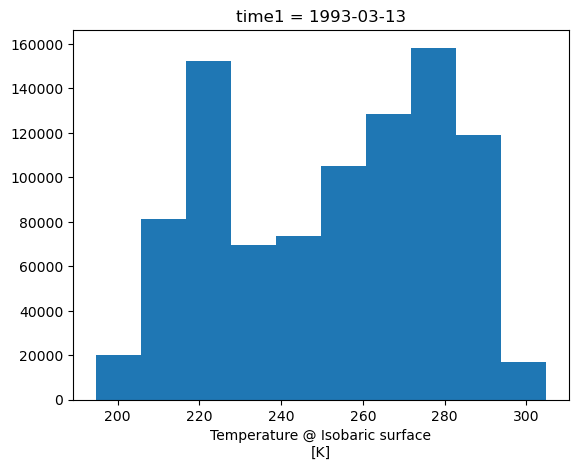

In [77]:
ds.Temperature_isobaric.plot()

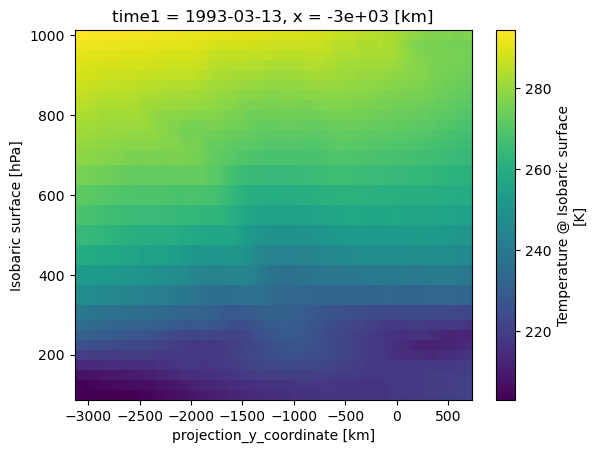

In [78]:
ds.Temperature_isobaric.isel(x=10).plot()

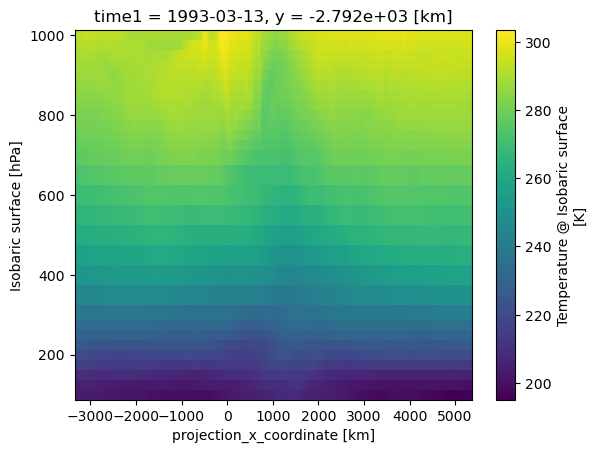

In [79]:
ds.Temperature_isobaric.isel(y=10).plot()

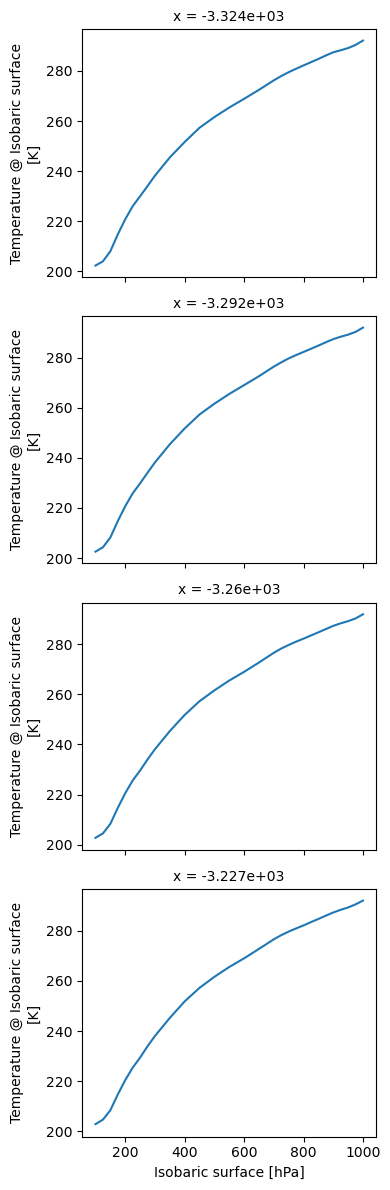

In [80]:
ds.Temperature_isobaric.isel(y=10, x=slice(None, 4)).plot(row='x')

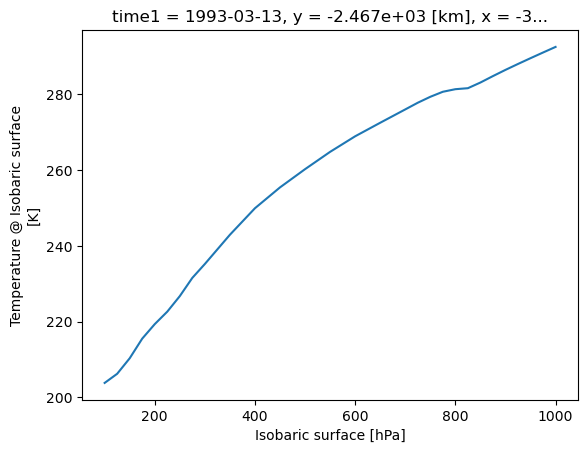

In [81]:
ds.isel(x=10, y=20).Temperature_isobaric.plot()

Xarray has recognized that the `DataArray` object calling the plot method has two coordinate variables, and generates a 2D plot using the `pcolormesh` method from Matplotlib.

In this case, we are looking at air temperatures on the 1000 hPa isobaric surface over North America. We could of course improve this figure by using [Cartopy](../cartopy) to handle the map projection and geographic features!

## Arithmetic Operations

Arithmetic operations with a single DataArray automatically apply over all array values (like NumPy). This process is called vectorization.  Let's convert the air temperature from degrees Celsius to kelvins:

In [83]:
ds = xr.open_dataset('CESM2_sst_data.nc')

ds.tos + 273.15

/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.3552 , 271.3553 , 271.3554 , ..., 271.35495, 271.355  ,
         271.3551 ],
        [271.36005, 271.36014, 271.36023, ..., 271.35986, 271.35992,
         271.36   ],
        [271.36447, 271.36453, 271.3646 , ..., 271.3643 , 271.36435,
         271.3644 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [271.40677, 271.40674, 271.4067 , ..., 271.40695, 271.4069 ,
         271.40683],
        [271.41296, 271.41293, 271.41293, ..., 271.41306, 271.413  ,
         271.41296],
        [271.41772, 271.41772, 271.41772, ..., 271.41766, 271.4177 ,
         271.4177 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.39386, 271.39383, 271.3938 , ..., 271.39407, 271.394  ,
         271.39392],
        [271.39935, 271.39932, 271.39932, ..., 271.39948, 271.39944,
         271.39938],
        [271.40372, 271.40372, 271.40375, ..., 271.4037 , 271.4037 ,
         271.40372]]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

Lets's square all values in `tos`:

In [84]:
ds.tos**2

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.2213385, 3.2209656, 3.220537 , ..., 3.2221622, 3.221913 ,
         3.2216525],
        [3.203904 , 3.203617 , 3.2032912, ..., 3.2045207, 3.2043478,
         3.2041442],
        [3.1881146, 3.1879027, 3.1876712, ..., 3.188714 , 3.1885312,
         3.1883302]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [3.0388296, 3.0389647, 3.0390673, ..., 3.038165 , 3.0383828,
         3.0386322],
        [3.0173173, 3.0173445, 3.0173297, ..., 3.0169601, 3.0171173,
         3.0172386],
        [3.000791 , 3.0007784, 3.0007539, ..., 3.000933 , 3.000896 ,
         3.0008452]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.0839543, 3.0841148, 3.0842566, ..., 3.0832636, 3.0834875,
         3.0837412],
        [3.064733 , 3.0648024, 3.0648358, ..., 3.0642793, 3.0644639,
         3.0646174],
        [3.0494578, 3.0494475, 3.0494263, ..., 3.049596 , 3.0495603,
         3.0495107]]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

## Aggregation Methods 

A very common step during data analysis is to summarize the data in question by computing aggregations like `sum()`, `mean()`, `median()`, `min()`, `max()` in which reduced data provide insight into the nature of large dataset. Let's explore some of these aggregation methods.


Compute the mean:

In [85]:
ds.tos

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.789945, -1.789865, ..., -1.790069, -1.790012],
        [-1.785529, -1.78547 , ..., -1.785646, -1.78559 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.794789, -1.794727, ..., -1.794875, -1.794837],
        [-1.79065 , -1.790609, ..., -1.790736, -1.790694]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.737043, -1.737051, ..., -1.736985, -1.73702 ],
        [-1.732279, -1.732275, ..., -1.732309, -1.732295]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.750638, -1.750658, ..., -1.750561, -1.750605],
        [-1.74627 , -1.746267, ..., -1.746299, -1.746285]]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In [88]:
ds.tos.mean(dim='lat')

<xarray.DataArray 'tos' (time: 180, lon: 360)>
array([[12.408382, 12.380761, 12.384995, ..., 12.364158, 12.233505,
        12.172286],
       [12.543158, 12.495917, 12.49329 , ..., 12.569471, 12.408849,
        12.353646],
       [12.57407 , 12.521931, 12.511641, ..., 12.591783, 12.434133,
        12.38138 ],
       ...,
       [11.732037, 11.844837, 11.918169, ..., 11.479838, 11.419108,
        11.202624],
       [11.614884, 11.67517 , 11.714593, ..., 11.422655, 11.329608,
        11.175385],
       [11.904719, 11.905442, 11.917092, ..., 11.787095, 11.677226,
        11.593427]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

Because we specified no `dim` argument the function was applied over all dimensions, computing the mean of every element of `tos` across time and space. It is possible to specify a dimension along which to compute an aggregation. For example, to calculate the mean in time for all locations, specify the time dimension as the dimension along which the mean should be calculated:

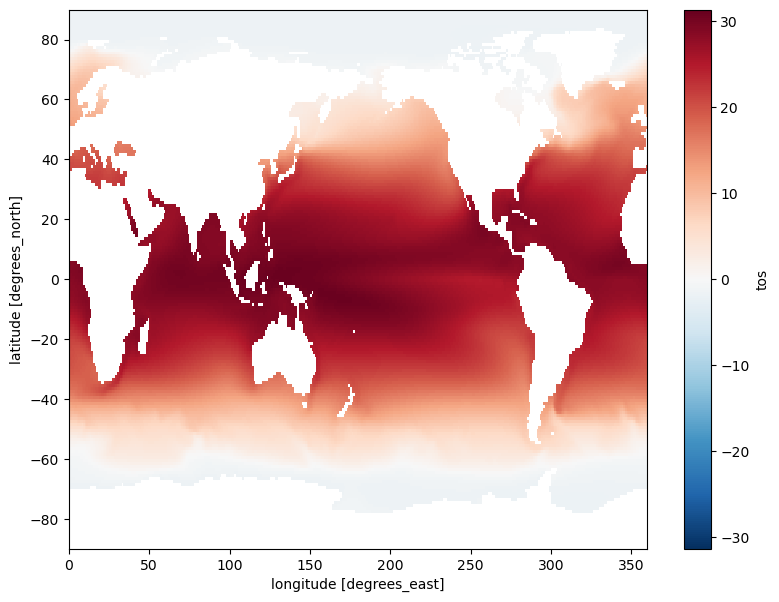

In [89]:
ds.tos.mean(dim='time').plot(size=7);

Compute the temporal min:

In [90]:
ds.tos.min(dim=['time'])

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.8083605, -1.8083031, -1.8082187, ..., -1.8083988, -1.8083944,
        -1.8083915],
       [-1.8025414, -1.8024837, -1.8024155, ..., -1.8026428, -1.8026177,
        -1.8025846],
       [-1.7984415, -1.7983989, -1.7983514, ..., -1.7985678, -1.7985296,
        -1.7984871]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

Compute the spatial sum:

In [91]:
ds.tos.sum(dim=['lat', 'lon'])

<xarray.DataArray 'tos' (time: 180)>
array([603767.  , 607702.5 , 603976.5 , 599373.56, 595119.94, 595716.75,
       598177.3 , 600670.6 , 597825.56, 591869.  , 590507.7 , 597189.2 ,
       605954.06, 609151.  , 606868.9 , 602329.9 , 599465.75, 601205.5 ,
       605144.4 , 608588.5 , 604046.9 , 598927.75, 597519.75, 603876.9 ,
       612424.44, 615765.2 , 612615.44, 606310.6 , 602034.4 , 600784.9 ,
       602013.5 , 603142.2 , 598850.9 , 591917.44, 589234.56, 596162.5 ,
       602942.06, 607196.9 , 604928.2 , 601735.6 , 599011.8 , 599490.9 ,
       600801.44, 602786.94, 598867.2 , 594081.8 , 593736.25, 598995.6 ,
       607285.25, 611901.06, 609562.75, 603527.3 , 600215.4 , 601372.6 ,
       604144.5 , 605376.75, 601256.2 , 595245.2 , 594002.06, 600490.4 ,
       611878.6 , 616563.  , 613050.8 , 605734.  , 600808.75, 600898.06,
       603930.56, 605644.7 , 599917.5 , 592048.06, 590082.8 , 596950.7 ,
       607701.94, 610844.7 , 609509.6 , 603380.94, 599838.1 , 600334.25,
       604386.6 , 607848.1 , 602155.2 , 594949.06, 593815.06, 598365.3 ,
       608730.8 , 612056.5 , 609922.5 , 603077.1 , 600134.1 , 602821.2 ,
       606152.75, 610257.8 , 604685.8 , 596858.  , 592894.8 , 599944.9 ,
       609764.44, 614610.75, 611434.75, 605606.4 , 603790.94, 605750.2 ,
       609250.06, 612935.7 , 609645.06, 601706.4 , 598896.5 , 605349.75,
       614671.8 , 618686.7 , 615895.2 , 609438.2 , 605399.56, 606126.75,
       607942.3 , 609680.4 , 604814.25, 595841.94, 591908.44, 595638.7 ,
       604798.94, 611327.1 , 609765.7 , 603727.56, 600970.  , 602514.  ,
       606303.7 , 609225.25, 603724.3 , 595944.8 , 594477.4 , 597807.4 ,
       607379.06, 611808.56, 610112.94, 607196.3 , 604733.06, 605488.25,
       610048.3 , 612655.75, 608906.25, 602349.7 , 601754.2 , 609220.4 ,
       619367.1 , 623783.2 , 619949.7 , 613369.06, 610190.8 , 611091.2 ,
       614213.44, 615665.06, 611722.2 , 606259.56, 605970.2 , 611463.3 ,
       619794.6 , 626036.5 , 623085.44, 616295.9 , 611886.3 , 611881.9 ,
       614420.75, 616853.56, 610375.44, 603471.5 , 602108.25, 608094.3 ,
       617450.7 , 623508.7 , 619830.2 , 612033.3 , 608737.2 , 610105.25,
       613692.7 , 616360.44, 611735.4 , 606512.7 , 604249.44, 608777.44],
      dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

Compute the temporal median:

In [92]:
ds.tos.median(dim='time')

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7648907, -1.7648032, -1.7647004, ..., -1.7650614, -1.7650102,
        -1.7649589],
       [-1.7590305, -1.7589546, -1.7588665, ..., -1.7591925, -1.7591486,
        -1.759095 ],
       [-1.7536805, -1.753602 , -1.7535168, ..., -1.753901 , -1.753833 ,
        -1.7537591]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

The following table summarizes some other built-in xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |

## GroupBy: Split, Apply, Combine

Simple aggregations can give useful summary of our dataset, but often we would prefer to aggregate conditionally on some coordinate labels or groups. Xarray provides the so-called `groupby` operation which enables the **split-apply-combine** workflow on xarray DataArrays and Datasets. The split-apply-combine operation is illustrated in this figure

<img src="./images/xarray-split-apply-combine.jpeg">

This makes clear what the `groupby` accomplishes:

- The split step involves breaking up and grouping an xarray Dataset or DataArray depending on the value of the specified group key.
- The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The combine step merges the results of these operations into an output xarray Dataset or DataArray.

We are going to use `groupby` to remove the seasonal cycle ("climatology") from our dataset. See the [xarray `groupby` user guide](https://xarray.pydata.org/en/stable/user-guide/groupby.html) for more examples of what `groupby` can take as an input.

First, let's select a gridpoint closest to a specified lat-lon, and plot a time series of SST at that point. The annual cycle will be quite evident.

In [ ]:
ds.tos.sel(lon=310, lat=50, method='nearest').plot();

### Split

Let's group data by month, i.e. all Januaries in one group, all Februaries in one group, etc.


In [95]:
ds.tos

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.789945, -1.789865, ..., -1.790069, -1.790012],
        [-1.785529, -1.78547 , ..., -1.785646, -1.78559 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.794789, -1.794727, ..., -1.794875, -1.794837],
        [-1.79065 , -1.790609, ..., -1.790736, -1.790694]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.737043, -1.737051, ..., -1.736985, -1.73702 ],
        [-1.732279, -1.732275, ..., -1.732309, -1.732295]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.750638, -1.750658, ..., -1.750561, -1.750605],
        [-1.74627 , -1.746267, ..., -1.746299, -1.746285]]], dtype=float32)
Coordinates:
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

In [98]:
ds.tos.groupby('time.season').mean()

<xarray.DataArray 'tos' (season: 4, lat: 180, lon: 360)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7796112, -1.779518 , -1.779407 , ..., -1.779786 ,
         -1.7797345, -1.7796829],
        [-1.7732689, -1.7731897, -1.7730962, ..., -1.7734209,
         -1.773382 , -1.7733315],
        [-1.767837 , -1.7677721, -1.7677007, ..., -1.768027 ,
         -1.7679691, -1.7679054]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7902642, -1.7901927, -1.7901045, ..., -1.7903785,
         -1.7903464, -1.7903149],
        [-1.7841699, -1.7841039, -1.7840254, ..., -1.7842804,
         -1.7842548, -1.7842187],
        [-1.7788147, -1.7787569, -1.7786926, ..., -1.7789872,
         -1.7789346, -1.7788768]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6898172, -1.6897992, -1.6897855, ..., -1.6898978,
         -1.6898724, -1.6898403],
        [-1.6898259, -1.6898205, -1.6898148, ..., -1.6898614,
         -1.6898499, -1.6898375],
        [-1.6884303, -1.6883883, -1.6883432, ..., -1.6885389,
         -1.688504 , -1.6884686]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

<div class="admonition alert alert-info">

In the above code, we are using the `.dt` [`DatetimeAccessor`](https://xarray.pydata.org/en/stable/generated/xarray.core.accessor_dt.DatetimeAccessor.html) to extract specific components of dates/times in our time coordinate dimension. For example, we can extract the year with `ds.time.dt.year`. See also the equivalent [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html).
    
   </div>

Xarray also offers a more concise syntax when the variable you’re grouping on is already present in the dataset. This is identical to `ds.tos.groupby(ds.time.dt.month)`:

In [ ]:
ds.tos.groupby('time.month')

### Apply & Combine 

Now that we have groups defined, it’s time to “apply” a calculation to the group. These calculations can either be:

- aggregation: reduces the size of the group
- transformation: preserves the group’s full size

At then end of the apply step, xarray will automatically combine the aggregated/transformed groups back into a single object. 



#### Compute climatology 


Let's calculate the climatology at every point in the dataset:


In [ ]:
tos_clim = ds.tos.groupby('time.month').mean()
tos_clim

Plot climatology at a specific point:

In [ ]:
tos_clim.sel(lon=310, lat=50, method='nearest').plot();

Plot zonal mean climatology:

In [ ]:
tos_clim.mean(dim='lon').transpose().plot.contourf(levels=12, cmap='turbo');

Calculate and plot the difference between January and December climatologies:

In [ ]:
(tos_clim.sel(month=1) - tos_clim.sel(month=12)).plot(size=6, robust=True);

#### Compute anomaly

Now let's combine the previous steps to compute climatology and use xarray's `groupby` arithmetic to remove this climatology from our original data:

In [ ]:
gb = ds.tos.groupby('time.month')
tos_anom = gb - gb.mean(dim='time')
tos_anom

In [ ]:
tos_anom.sel(lon=310, lat=50, method='nearest').plot();

Let's compute and visualize the mean global anomaly over time. We need to specify both `lat` and `lon` dimensions in the `dim` argument to `mean()`:

In [ ]:
unweighted_mean_global_anom = tos_anom.mean(dim=['lat', 'lon'])
unweighted_mean_global_anom.plot();

unweighted_mean_global_anom = tos_anom.mean(dim=['lat', 'lon'])
unweighted_mean_global_anom.plot();

Let's first load the cell area data from another CESM2 dataset that contains the weights for the grid cells:

In [ ]:
areacello = xr.open_dataset('CESM2_grid_variables.nc').areacello
areacello

As before, let's calculate area-weighted mean global anomaly:

In [ ]:
weighted_mean_global_anom = tos_anom.weighted(areacello).mean(dim=['lat', 'lon'])

Let's plot both unweighted and weighted means:

In [ ]:
unweighted_mean_global_anom.plot(size=7)
weighted_mean_global_anom.plot()
plt.legend(['unweighted', 'weighted']);

## Other high level computation functionality

- `resample`: [Groupby-like functionality specifialized for time dimensions. Can be used for temporal upsampling and downsampling](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `rolling`: [Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen`: [Generic functionality for downsampling data](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)



For example, resample to annual frequency:

In [ ]:
r = ds.tos.resample(time='AS')
r

In [ ]:
r.mean()

Compute a 5-month moving average:

In [ ]:
m_avg = ds.tos.rolling(time=5, center=True).mean()
m_avg

In [ ]:
lat = 50
lon = 310

m_avg.isel(lat=lat, lon=lon).plot(size=6)
ds.tos.isel(lat=lat, lon=lon).plot()
plt.legend(['5-month moving average', 'monthly data']);

## Masking Data

Using the `xr.where()` or `.where()` method, elements of an xarray Dataset or xarray DataArray that satisfy a given condition or multiple conditions can be replaced/masked. To demonstrate this, we are going to use the `.where()` method on the `tos` DataArray. 

We will use the same sea surface temperature dataset:

In [ ]:
ds

### Using `where` with one condition

Imagine we wish to analyze just the last time in the dataset. We could of course use `.isel()` for this:

In [ ]:
sample = ds.tos.isel(time=-1)
sample

Unlike `.isel()` and `.sel()` that change the shape of the returned results, `.where()` preserves the shape of the original data. It accomplishes this by returning values from the original DataArray or Dataset if the `condition` is `True`, and fills in values (by default `nan`) wherever the `condition` is `False`. 

Before applying it, let's look at the [`.where()` documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html). As the documention points out, the conditional expression in `.where()` can be: 

- a DataArray
- a Dataset
- a function

For demonstration purposes, let's use `.where()` to mask locations with temperature values greater than `0`:

In [ ]:
masked_sample = sample.where(sample < 0.0)
masked_sample

Let's plot both our original sample, and the masked sample:

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0])
masked_sample.plot(ax=axes[1]);

### Using `where` with multiple conditions

`.where()` allows providing multiple conditions. To do this, we need to make sure each conditional expression is enclosed in `()`. To combine conditions, we use the `bit-wise and` (`&`) operator and/or the `bit-wise or` (`|`). Let's use `.where()` to mask locations with temperature values less than 25 and greater than 30:

In [ ]:
sample.where((sample > 25) & (sample < 30)).plot(size=6);

We can use coordinates to apply a mask as well. Below, we use the `latitude` and `longitude` coordinates to mask everywhere outside of the [Niño 3.4 region](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/):

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)


In [ ]:
sample.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
).plot(size=6)

### Using `where` with a custom fill value

`.where()` can take a second argument, which, if supplied, defines a fill value for the masked region. Below we fill masked regions with a constant `0`:

In [ ]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6)

---

## Summary

Xarray brings the joy of Pandas-style labeled data operations to N-dimensional data. As such, it has become a central workhorse in the geoscience community for the analysis of gridded datasets. Xarray allows us to open self-describing NetCDF files and make full use of the coordinate axes, labels, units, and other metadata. By making use of labeled coordinates, our code is often easier to write, easier to read, and more robust.


## Resources and references

This notebook was adapated from material in [Unidata's Python Training](https://unidata.github.io/python-training/workshop/XArray/xarray-and-cf/).

The best resource for Xarray is the [Xarray documentation](http://xarray.pydata.org/en/stable/). See in particular
- [Why Xarray](http://xarray.pydata.org/en/stable/getting-started-guide/why-xarray.html)
- [Quick overview](http://xarray.pydata.org/en/stable/getting-started-guide/quick-overview.html#)
- [Example gallery](http://xarray.pydata.org/en/stable/gallery.html)

Another excellent resource is this [Xarray Tutorial collection](https://xarray-contrib.github.io/xarray-tutorial/).